In [35]:
import pandas as pa
from mlxtend.frequent_patterns import apriori, association_rules

In [36]:
data=pa.read_excel("Transaksi Penjualan Obat.xlsx")
data.head()

,Nomor Ref,Tanggal,Kode PLU,Nama Produk,Satuan,Harga Satuan,QTY,Jum. Penjualan
0,RJJ-0000001,2022-03-02 00:00:00,400,SAKATONIK ABC GRAPE 30,PCS,17000.0,1,17000.0
1,RJJ-0000002,2022-03-02 00:00:00,294,MINYAK KAYU PUTIH LANG 60,PCS,23000.0,2,46000.0
2,RJJ-0000003,2022-03-02 00:00:00,290,MINYAK HERBA SINERGI 2020,PCS,35000.0,1,35000.0
3,RJJ-0000003,2022-03-02 00:00:00,325,NEUROBION 5 STRIP @10 TAB,PCS,2500.0,1,2500.0
4,RJJ-0000004,2022-03-03 00:00:00,36,AMLODIPIN 5MG,PCS,400.0,3,1200.0


In [37]:
data.columns

Index(['Nomor Ref', 'Tanggal', 'Kode PLU', 'Nama Produk', 'Satuan',
       'Harga Satuan', 'QTY', 'Jum. Penjualan'],
      dtype='object')

In [38]:
data['Nama Produk']=data['Nama Produk'].str.strip()

data.dropna(axis=0,subset=['Nomor Ref'], inplace = True)
data['Nomor Ref']=data['Nomor Ref'].astype('str')

In [39]:
newdata=data.groupby(['Nomor Ref','Nama Produk'])['QTY'].sum().unstack().reset_index().fillna(0).set_index('Nomor Ref')
newdata

Nama Produk,ACETYLSISTEIN NULAB 200MG BOX 10 PCS STRIP@10 CAPS,ALOCLAIR PLUS GEL 8 GRAM TUBE,AMBEVEN BOX 10 BLS @ 10 CAPS,AMLODIPIN 5MG,AMOXICILLIN 500 MG,ANAKONIDIN 60 ML,ANTANGIN CAIR JRG,ANTANGIN HABBATUSSAUDA CAIR,ANTIS HANDSPRAY SANITIZER 30ML,ASAM MEFENAMAT 500 MG,...,SWEETY SILVER PANTS S32,TEMPRA DROPS RASA ANGGUR 15 ML,THROMBOPHOB GEL 20 GR,VICEE JERUK 50 STRIP @2 TAB,VICEE STRAWBERRY 50 STRIP @2 TAB,VITAL EAR OIL,WOODS LOZENGES HONEY LEMON ISI 6,XONCE,ZAMBUK OINTMENT 25 GR,ZEGAVIT
Nomor Ref,,,,,,,,,,,,,,,,,,,,,
RJJ-0000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RJJ-0000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RJJ-0000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RJJ-0000004,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RJJ-0000005,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RJJ-0000305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RJJ-0000306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RJJ-0000307,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
def hot_encode(x):
    if(x<= 0):
        return False
    if(x>=1):
        return True

In [41]:
newdata_encoded=newdata.applymap(hot_encode)
newdata=newdata_encoded
newdata

Nama Produk,ACETYLSISTEIN NULAB 200MG BOX 10 PCS STRIP@10 CAPS,ALOCLAIR PLUS GEL 8 GRAM TUBE,AMBEVEN BOX 10 BLS @ 10 CAPS,AMLODIPIN 5MG,AMOXICILLIN 500 MG,ANAKONIDIN 60 ML,ANTANGIN CAIR JRG,ANTANGIN HABBATUSSAUDA CAIR,ANTIS HANDSPRAY SANITIZER 30ML,ASAM MEFENAMAT 500 MG,...,SWEETY SILVER PANTS S32,TEMPRA DROPS RASA ANGGUR 15 ML,THROMBOPHOB GEL 20 GR,VICEE JERUK 50 STRIP @2 TAB,VICEE STRAWBERRY 50 STRIP @2 TAB,VITAL EAR OIL,WOODS LOZENGES HONEY LEMON ISI 6,XONCE,ZAMBUK OINTMENT 25 GR,ZEGAVIT
Nomor Ref,,,,,,,,,,,,,,,,,,,,,
RJJ-0000001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RJJ-0000002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RJJ-0000003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RJJ-0000004,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RJJ-0000005,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RJJ-0000305,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RJJ-0000306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RJJ-0000307,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
import time

start_time = time.time()
frq_items=apriori(newdata,min_support=0.01,use_colnames=True)
end_time = time.time()
total_time = end_time - start_time

rules = association_rules(frq_items, metric="confidence", min_threshold=0.5)

print("Frequent Itemsset:")
print(frq_items)

print("Association Rules:")
print(rules)

print(f"\nWaktu komputasi Apriori: {total_time:.5f} detik")

Frequent Itemsset:
     support                                           itemsets
0   0.013378  (ACETYLSISTEIN NULAB 200MG BOX 10 PCS STRIP@10...
1   0.010033                    (ALOCLAIR PLUS GEL 8 GRAM TUBE)
2   0.013378                     (AMBEVEN BOX 10 BLS @ 10 CAPS)
3   0.013378                                    (AMLODIPIN 5MG)
4   0.016722                               (AMOXICILLIN 500 MG)
..       ...                                                ...
71  0.013378                 (WOODS LOZENGES HONEY LEMON ISI 6)
72  0.026756                                            (XONCE)
73  0.013378                                          (ZEGAVIT)
74  0.010033     (CESSA BABY 0-2 TH BODY FIT 8 ML, SANMOL DROP)
75  0.010033  (PROMAG TAB 3 STRIP X 10 TAB, KETOMED SCALP SO...

[76 rows x 2 columns]
Association Rules:
                         antecedents                        consequents  \
0  (CESSA BABY 0-2 TH BODY FIT 8 ML)                      (SANMOL DROP)   
1                    

In [ ]:
G = nx.DiGraph()

for _, rule in rules.iterrows():
    G.add_edge(rule['antecedents'], rule['consequents'], weight=rule['support'])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)

In [47]:

start_time = time.time()
frq_items=apriori(newdata,min_support=0.01,use_colnames=True)
end_time = time.time()
total_time = end_time - start_time

rules = association_rules(frq_items, metric="confidence", min_threshold=0.3)

print("Frequent Itemsset:")
print(frq_items)

print("Association Rules:")
print(rules)

print(f"\nWaktu komputasi Apriori: {total_time:.5f} detik")

Frequent Itemsset:
     support                                           itemsets
0   0.013378  (ACETYLSISTEIN NULAB 200MG BOX 10 PCS STRIP@10...
1   0.010033                    (ALOCLAIR PLUS GEL 8 GRAM TUBE)
2   0.013378                     (AMBEVEN BOX 10 BLS @ 10 CAPS)
3   0.013378                                    (AMLODIPIN 5MG)
4   0.016722                               (AMOXICILLIN 500 MG)
..       ...                                                ...
71  0.013378                 (WOODS LOZENGES HONEY LEMON ISI 6)
72  0.026756                                            (XONCE)
73  0.013378                                          (ZEGAVIT)
74  0.010033     (CESSA BABY 0-2 TH BODY FIT 8 ML, SANMOL DROP)
75  0.010033  (PROMAG TAB 3 STRIP X 10 TAB, KETOMED SCALP SO...

[76 rows x 2 columns]
Association Rules:
                         antecedents                        consequents  \
0  (CESSA BABY 0-2 TH BODY FIT 8 ML)                      (SANMOL DROP)   
1                    

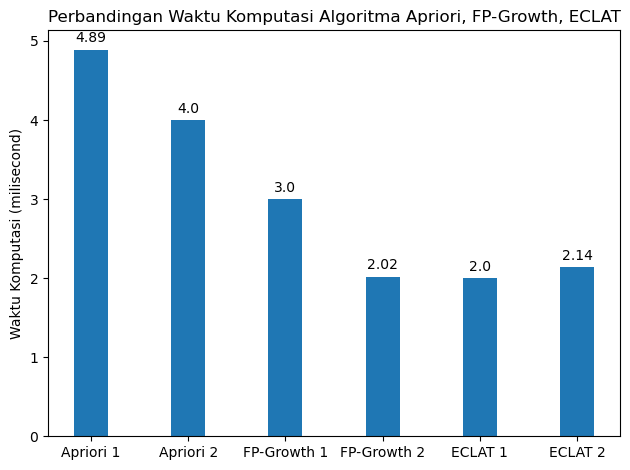

In [2]:
import matplotlib.pyplot as plt
import numpy as np

algorithms = ['Apriori 1', 'Apriori 2', 'FP-Growth 1', 'FP-Growth 2', 'ECLAT 1', 'ECLAT 2']
time = [4.89, 4, 3, 2.02, 2, 2.14] 

x = np.arange(len(algorithms))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x, time, width)

ax.set_ylabel('Waktu Komputasi (milisecond)')
ax.set_title('Perbandingan Waktu Komputasi Algoritma Apriori, FP-Growth, ECLAT')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate('{}'.format(h),
                    xy=(rect.get_x() + rect.get_width() / 2, h),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

fig.tight_layout()

plt.show()

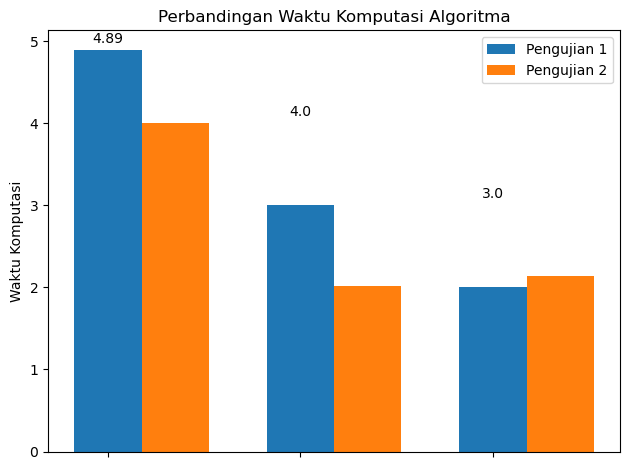

In [6]:
algoritma = ['Apriori', 'FP-growth', 'Eclat']
waktu_uji1 = [4.89, 3, 2] 
waktu_uji2 = [4, 2.02, 2.14]

x = np.arange(len(algoritma))  # lokasi label bar chart
width = 0.35  # lebar tiap bar chart

fig, ax = plt.subplots()

# Buat bar chart waktu pengujian 1  
p1 = plt.bar(x, waktu_uji1, width, label='Pengujian 1')  

# Buat bar chart waktu pengujian 2 di sebelahnya
p2 = plt.bar(x + width, waktu_uji2, width, label='Pengujian 2')

plt.ylabel('Waktu Komputasi')
plt.title('Perbandingan Waktu Komputasi Algoritma')
plt.xticks(x + width / 2, algoritma)
ax.set_xticks(x)
plt.legend(loc='best')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate('{}'.format(h),
                    xy=(rect.get_x() + rect.get_width() / 2, h),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
plt.tight_layout()
plt.show()

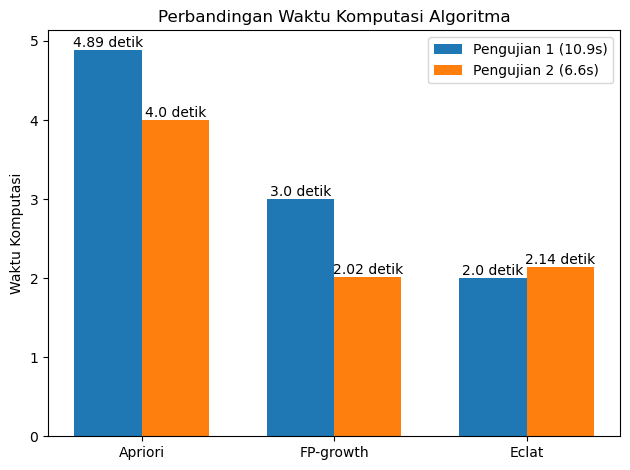

In [8]:
algoritma = ['Apriori', 'FP-growth', 'Eclat']
waktu_uji1 = [4.89, 3, 2] 
waktu_uji2 = [4, 2.02, 2.14] 

x = np.arange(len(algoritma))  
width = 0.35  

# Tambahkan label waktu di atas tiap bar chart
plt.bar(x, waktu_uji1, width, label='Pengujian 1 (10.9s)')  
plt.bar(x + width, waktu_uji2, width, label='Pengujian 2 (6.6s)') 

plt.ylabel('Waktu Komputasi')
plt.title('Perbandingan Waktu Komputasi Algoritma')
plt.xticks(x + width / 2, algoritma)
plt.legend(loc='best')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., height, f'{height} detik',
                ha='center', va='bottom')

autolabel(p1)
autolabel(p2)

plt.tight_layout() 
plt.show()